## **Task 2**

### **Task 2.1 - K-Means y Segmentación de Clientes de Banco**

### Exploración de datos

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, adjusted_rand_score
import matplotlib.pyplot as plt

df = pd.read_csv('bank_transactions.csv')
df

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5
...,...,...,...,...,...,...,...,...,...
1048562,T1048563,C8020229,8/4/90,M,NEW DELHI,7635.19,18/9/16,184824,799.0
1048563,T1048564,C6459278,20/2/92,M,NASHIK,27311.42,18/9/16,183734,460.0
1048564,T1048565,C6412354,18/5/89,M,HYDERABAD,221757.06,18/9/16,183313,770.0
1048565,T1048566,C6420483,30/8/78,M,VISAKHAPATNAM,10117.87,18/9/16,184706,1000.0


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048567 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   TransactionID            1048567 non-null  object 
 1   CustomerID               1048567 non-null  object 
 2   CustomerDOB              1045170 non-null  object 
 3   CustGender               1047467 non-null  object 
 4   CustLocation             1048416 non-null  object 
 5   CustAccountBalance       1046198 non-null  float64
 6   TransactionDate          1048567 non-null  object 
 7   TransactionTime          1048567 non-null  int64  
 8   TransactionAmount (INR)  1048567 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 72.0+ MB


In [5]:
df['CustGender'].unique()
df[df['CustGender']=='T'] # solamente hay un dato. 


,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
959987,T959988,C3380368,1/1/1800,T,CHENNAI,50050.0,10/9/16,170731,32500.0


In [21]:
df.drop(df[df['CustGender']=='T'].index,inplace=True)


In [22]:
# 'CustomerDOB' a datetime 
df['CustomerDOB'] = pd.to_datetime(df['CustomerDOB'])

# 'TransactionDate' a datetime 
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])

In [23]:
# Calculando la edad de cada ciente 
df['CusAge'] = (df['TransactionDate'].dt.year - df['CustomerDOB'].dt.year)
df['CusAge'].value_counts()
df['CusAge'] = df['CusAge'].abs()
df['CusAge']


0          22.0
1          41.0
2          20.0
3          57.0
4          28.0
           ... 
1048562    26.0
1048563    24.0
1048564    27.0
1048565    38.0
1048566    32.0
Name: CusAge, Length: 1048566, dtype: float64

In [24]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1048566 entries, 0 to 1048566
Data columns (total 10 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   TransactionID            1048566 non-null  object        
 1   CustomerID               1048566 non-null  object        
 2   CustomerDOB              1045169 non-null  datetime64[ns]
 3   CustGender               1047466 non-null  object        
 4   CustLocation             1048415 non-null  object        
 5   CustAccountBalance       1046197 non-null  float64       
 6   TransactionDate          1048566 non-null  datetime64[ns]
 7   TransactionTime          1048566 non-null  int64         
 8   TransactionAmount (INR)  1048566 non-null  float64       
 9   CusAge                   1045169 non-null  float64       
dtypes: datetime64[ns](2), float64(3), int64(1), object(4)
memory usage: 88.0+ MB


In [25]:
# Calcular el Gasto Total por Cliente
total_spent_per_customer = df.groupby('CustomerID')['TransactionAmount (INR)'].sum().reset_index(name='TotalSpent')
total_spent_per_customer

,CustomerID,TotalSpent
0,C1010011,5106.0
1,C1010012,1499.0
2,C1010014,1455.0
3,C1010018,30.0
4,C1010024,5000.0
...,...,...
884259,C9099836,691.0
884260,C9099877,222.0
884261,C9099919,126.0
884262,C9099941,50.0


### Codificación y Escaler de datos

In [26]:
from sklearn.preprocessing import LabelEncoder

df.drop(columns=['TransactionID', 'CustomerDOB', 'TransactionTime'], axis=1, inplace=True)

encoder = LabelEncoder()
df['CustGender'] = encoder.fit_transform(df['CustGender'])
df['CustLocation'] = encoder.fit_transform(df['CustLocation'])
df

,CustomerID,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionAmount (INR),CusAge
0,C5841053,0,3586,17819.05,2016-02-08,25.0,22.0
1,C2142763,1,3648,2270.69,2016-02-08,27999.0,41.0
2,C4417068,0,5268,17874.44,2016-02-08,459.0,20.0
3,C5342380,0,5268,866503.21,2016-02-08,2060.0,57.0
4,C9031234,0,5657,6714.43,2016-02-08,1762.5,28.0
...,...,...,...,...,...,...,...
1048562,C8020229,1,5792,7635.19,2016-09-18,799.0,26.0
1048563,C6459278,1,5629,27311.42,2016-09-18,460.0,24.0
1048564,C6412354,1,3394,221757.06,2016-09-18,770.0,27.0
1048565,C6420483,1,9137,10117.87,2016-09-18,1000.0,38.0


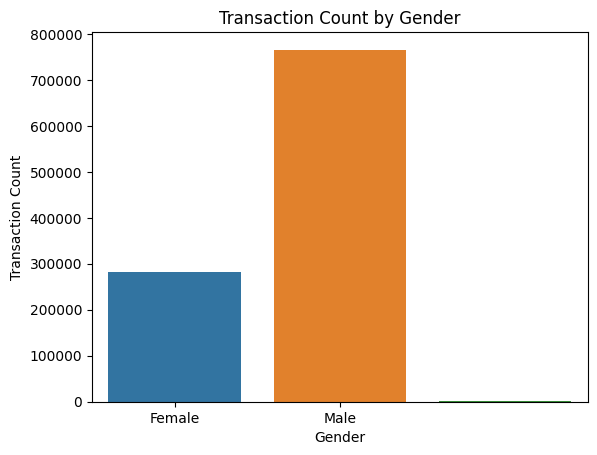

1    765530
0    281936
2      1100
Name: CustGender, dtype: int64


In [27]:
gender_counts = df['CustGender'].value_counts()

sns.countplot(data=df, x='CustGender')
plt.xlabel('Gender')
plt.ylabel('Transaction Count')
plt.xticks([0, 1], ['Female', 'Male'])
plt.title('Transaction Count by Gender')
plt.show()

print(gender_counts)

La mayoría de transacciones son generadas por hombres

In [29]:
df.drop('CustomerID', axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1048566 entries, 0 to 1048566
Data columns (total 6 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   CustGender               1048566 non-null  int32         
 1   CustLocation             1048566 non-null  int32         
 2   CustAccountBalance       1046197 non-null  float64       
 3   TransactionDate          1048566 non-null  datetime64[ns]
 4   TransactionAmount (INR)  1048566 non-null  float64       
 5   CusAge                   1045169 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int32(2)
memory usage: 48.0 MB


In [32]:
scaler = StandardScaler()
# escalamiento de variables numericas
numerical = ['CustAccountBalance', 'TransactionAmount (INR)', 'CusAge']
df[numerical] = scaler.fit_transform(df[numerical])
df.head()

,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionAmount (INR),CusAge
0,0,3586,-0.115282,2016-02-08,-0.235648,-0.440524
1,1,3648,-0.133650,2016-02-08,4.019164,0.002219
2,0,5268,-0.115217,2016-02-08,-0.169637,-0.487128
3,0,5268,0.887316,2016-02-08,0.073874,0.375056
4,0,5657,-0.128401,2016-02-08,0.028624,-0.300710


In [ ]:
# PCA